## <center>Forecasting Assignment(Airlines)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To predict the Passenger ticket sales for airlines.</code>


In [1]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file and having a glance at the data
airline_data = pd.read_excel("Airlines+Data.xlsx")
airline_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


#### Making necessary EDA of the model

<AxesSubplot:>

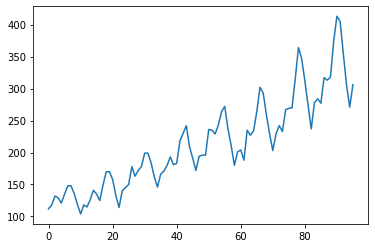

In [3]:
#To identify the past trend and perform analytics on the data
airline_data.Passengers.plot()

In [4]:
#Checking for the datatypes and null values if present any
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
#Looking into statistical report of the data
airline_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
temp=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

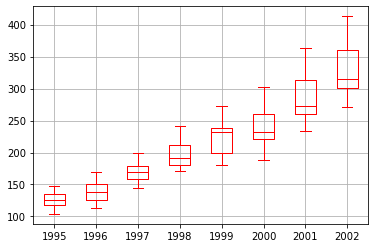

In [7]:
#Checking for outliers in the each year using boxplot
group=temp.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot(color='red')
plt.show()

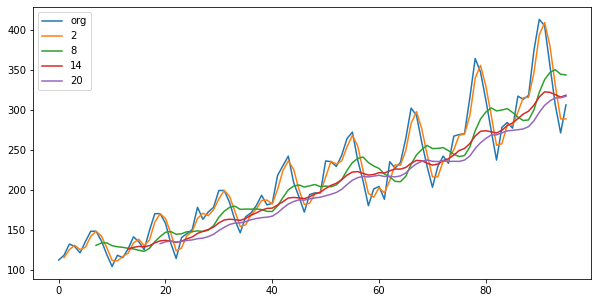

In [8]:
#Moving Average plot
plt.figure(figsize=(10,5))
airline_data.Passengers.plot(label="org")
for i in range(2,24,6):
    airline_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

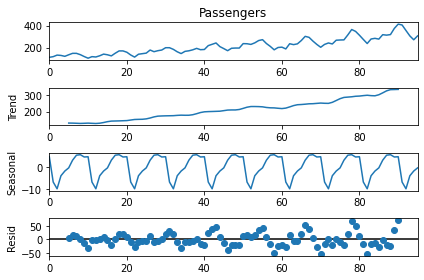

In [9]:
#Time decomposition Plot
decompose_ts_add = seasonal_decompose(airline_data.Passengers,period=10)
decompose_ts_add.plot()
plt.show()

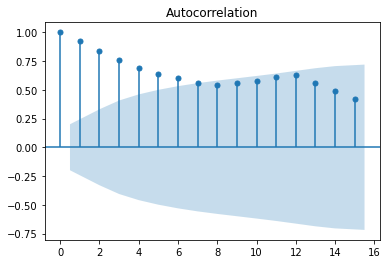

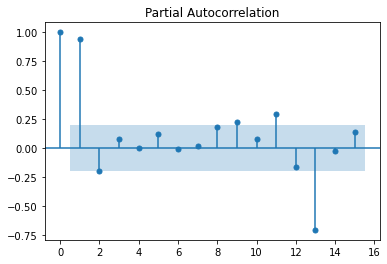

In [10]:
#ACF plots and PACF plots to identify the significant features that contribute to forecast
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline_data.Passengers,lags=15)
tsa_plots.plot_pacf(airline_data.Passengers,lags=15)
plt.show()


#### Building the Data Driven Forecasting Models

In [11]:
#Train and test split on the data
train = airline_data.head(77)
test = airline_data.tail(19)

In [12]:
#Creating a user defined function to calculate the RMSE value
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

#### Creating a Simple Exponential Data Driven model

In [13]:
#Developing the simple Exponential method
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.3)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
root_MSE=RMSE(pred_ses,test.Passengers) 
root_MSE

76.58414848256268

#### Creating a Holts Data Driven model

In [14]:
#Developing the Holts method
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.3)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
root_MSE2=RMSE(pred_hw,test.Passengers) 
root_MSE2

53.10237854882006

#### Creating Holts Winter Exponential with Additive Seasonality and Additive trend

In [15]:
#Developing the Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=15).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
root_MSE3=RMSE(pred_hwe_add_add,test.Passengers) 
root_MSE3

49.96056442154601

#### Creating Holts Winter Exponential with Multiplicative Seasonality and Additive trend

In [16]:
#Developing the Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
root_MSE4=RMSE(pred_hwe_mul_add,test.Passengers)
root_MSE4

30.906355345739424

In [17]:
#Tabulating the RMSE values of the model
Table={"model":pd.Series(['Simple exponential','Holts model','Holts-add seas,add trend','holts-mul sea,add trend']),
   "RMSE":[root_MSE,root_MSE2,root_MSE3,root_MSE4]
  }
Table=pd.DataFrame(Table)
Table

,model,RMSE
0,Simple exponential,76.584148
1,Holts model,53.102379
2,"Holts-add seas,add trend",49.960564
3,"holts-mul sea,add trend",30.906355


In [18]:
#Predicting the data on lowest RMSE value
hwe_model_mul_add_new = ExponentialSmoothing(airline_data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [19]:
#Forecasting for next 10 time periods
hwe_model_mul_add_new.forecast(10)

96     312.899621
97     308.171842
98     355.533280
99     345.770538
100    345.696942
101    392.471843
102    436.502723
103    429.860774
104    380.174082
105    332.318802
dtype: float64

#### Insights Drawn:
>From the above models, the model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend. Thus, using it to forecast the airlines passengers ticket prices.